## Семинар 9: Линейные модели (Linear models)

<a href="https://colab.research.google.com/github/SergeyMalashenko/MachineLearning_Summer_2023/blob/main/seminars/8/seminar_8.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

In [68]:
from scipy.io import loadmat
from io import BytesIO
import requests

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn         import linear_model

import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import pandas  as pd
import numpy   as np
import scipy   as sp

In [69]:
from sklearn import set_config
set_config(transform_output = "pandas")

### Набор данных

Real Estate Dataset (Набор данных о продаже объектов недвижимости)

Набор данных состоит из 414 наблюдений и 7 числовых признаков, которые выглядят следующим образом:



| Признак                                    | Описание                              |
|--------------------------------------------|---------------------------------------|
| X1 transaction date                        | Дата сделки                           |
| X2 house age                               | Возраст дома                          |
| X3 distance to the nearest MRT station     | Расстояние до ближайшей станции метро |
| X4 number of convenience stores            | количество круглосуточных магазинов   |
| X5 latitude                                | Широта                                |
| X6 longitude                               | Долгота                               |
| Y house price of unit area                 | Стоимость за квадратный метр          |




In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.preprocessing   import Normalizer

#path = "data/prostate.csv"
path = "data/real_estate.csv"
X = pd.read_csv(path, index_col='No')
#standartize data
scaler = Normalizer()
X = scaler.fit_transform(X)

y = X.pop('Y house price of unit area')



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
No,,,,,,
1,0.996909,0.015848,0.042037,0.004953,0.012373,0.060194
2,0.986502,0.009557,0.150258,0.004411,0.012243,0.059565
3,0.961230,0.006349,0.268276,0.002387,0.011928,0.058022
4,0.961143,0.006349,0.268263,0.002387,0.011928,0.058019
5,0.979676,0.002434,0.190095,0.002434,0.012158,0.059157


In [71]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    float64
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
dtypes: float64(6)
memory usage: 22.6 KB


In [72]:
X.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,0.871381,0.007671,0.358914,0.001930,0.010808,0.052606
std,0.177865,0.005558,0.277563,0.001481,0.002208,0.010741
min,0.296356,0.000000,0.011591,0.000000,0.003673,0.017878
25%,0.809536,0.003407,0.141940,0.000491,0.010037,0.048880
50%,0.969419,0.006338,0.237059,0.001919,0.012022,0.058524
75%,0.987650,0.011414,0.584855,0.002960,0.012256,0.059630
max,0.997753,0.021697,0.954898,0.004953,0.012377,0.060252


### Визуализация данных

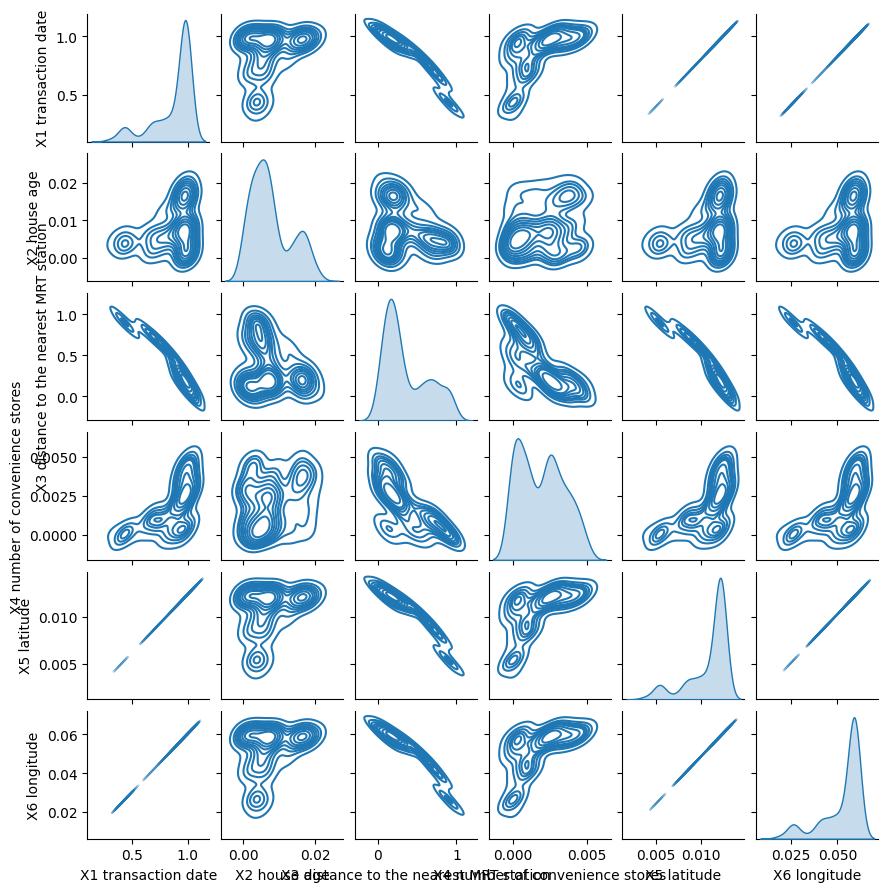

In [73]:
sns.pairplot(X, height=1.5, kind="kde");

<AxesSubplot:>

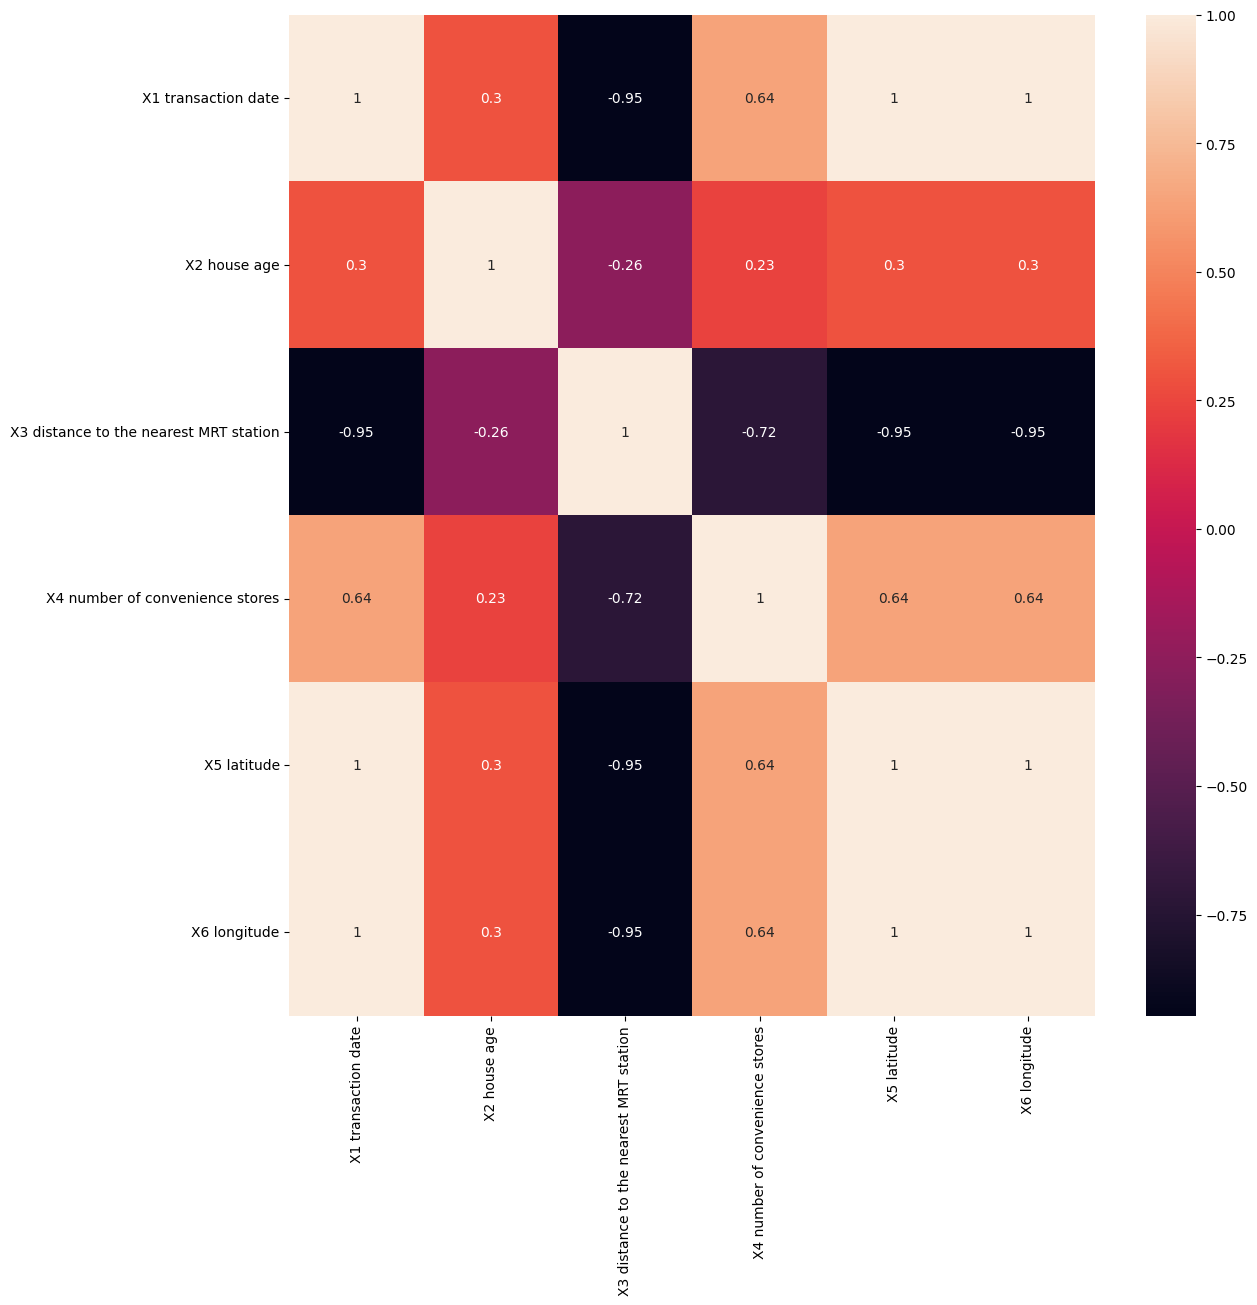

In [74]:
fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(X.corr(method='pearson'), annot=True)

### Linear regression (Линейная регрессия)
Линейная регрессия представляет собой модель вида 
$$
\vec{y} = W{\cdot}\vec{x} + \vec{b}
$$


/tmp/ipykernel_75025/2966027219.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_test.values, y_pred, 'or', color='red' )


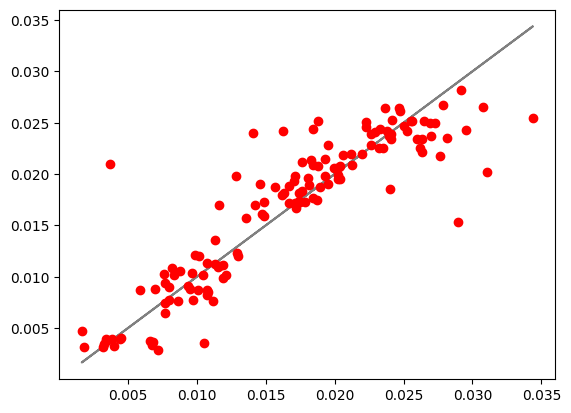

,metrics
MAE,0.002197
MSE,0.000012
RMSE,0.003394


In [75]:
# LinearRegression
current_model = linear_model.LinearRegression()
current_model.fit(X_train, y_train)
y_pred =  current_model.predict(X_test)

plt.plot(y_test.values, y_test.values,color='grey')
plt.plot(y_test.values, y_pred, 'or', color='red' )
plt.show()

#mean_squared_error(y_test, y_pred)

MAE  = mean_absolute_error(y_test,y_pred)
MSE  = mean_squared_error (y_test,y_pred)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE, MSE ,RMSE],index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

Метод линейно регрессии приближает наборы данных прямыми, плоскостями и гиперплоскостями. 
Складывается впечатление, что этот подход ограничивается лишь строго линейными отношениями между переменными, но ослабление этого требования также возможно.

### Конструирование признаков (Feature Engineering)

Одним из приемов, позволяющих адаптировать линейную регрессию к нелинейным связям между переменными, является преобразование данных в соответствии с некоторым *набором функций*.

In [76]:
from sklearn.pipeline import make_pipeline

#### Полиномиальные функции (Polynomial basis features)
Исходные признаки
$$
\{ x, y, z\}
$$

Целевые признаки
$$
\{ x, y, z, x^2, y^2, z^2, xy, xz, yz, ... \}
$$

Какой вид имеют признаки следующего порядка?

<AxesSubplot:>

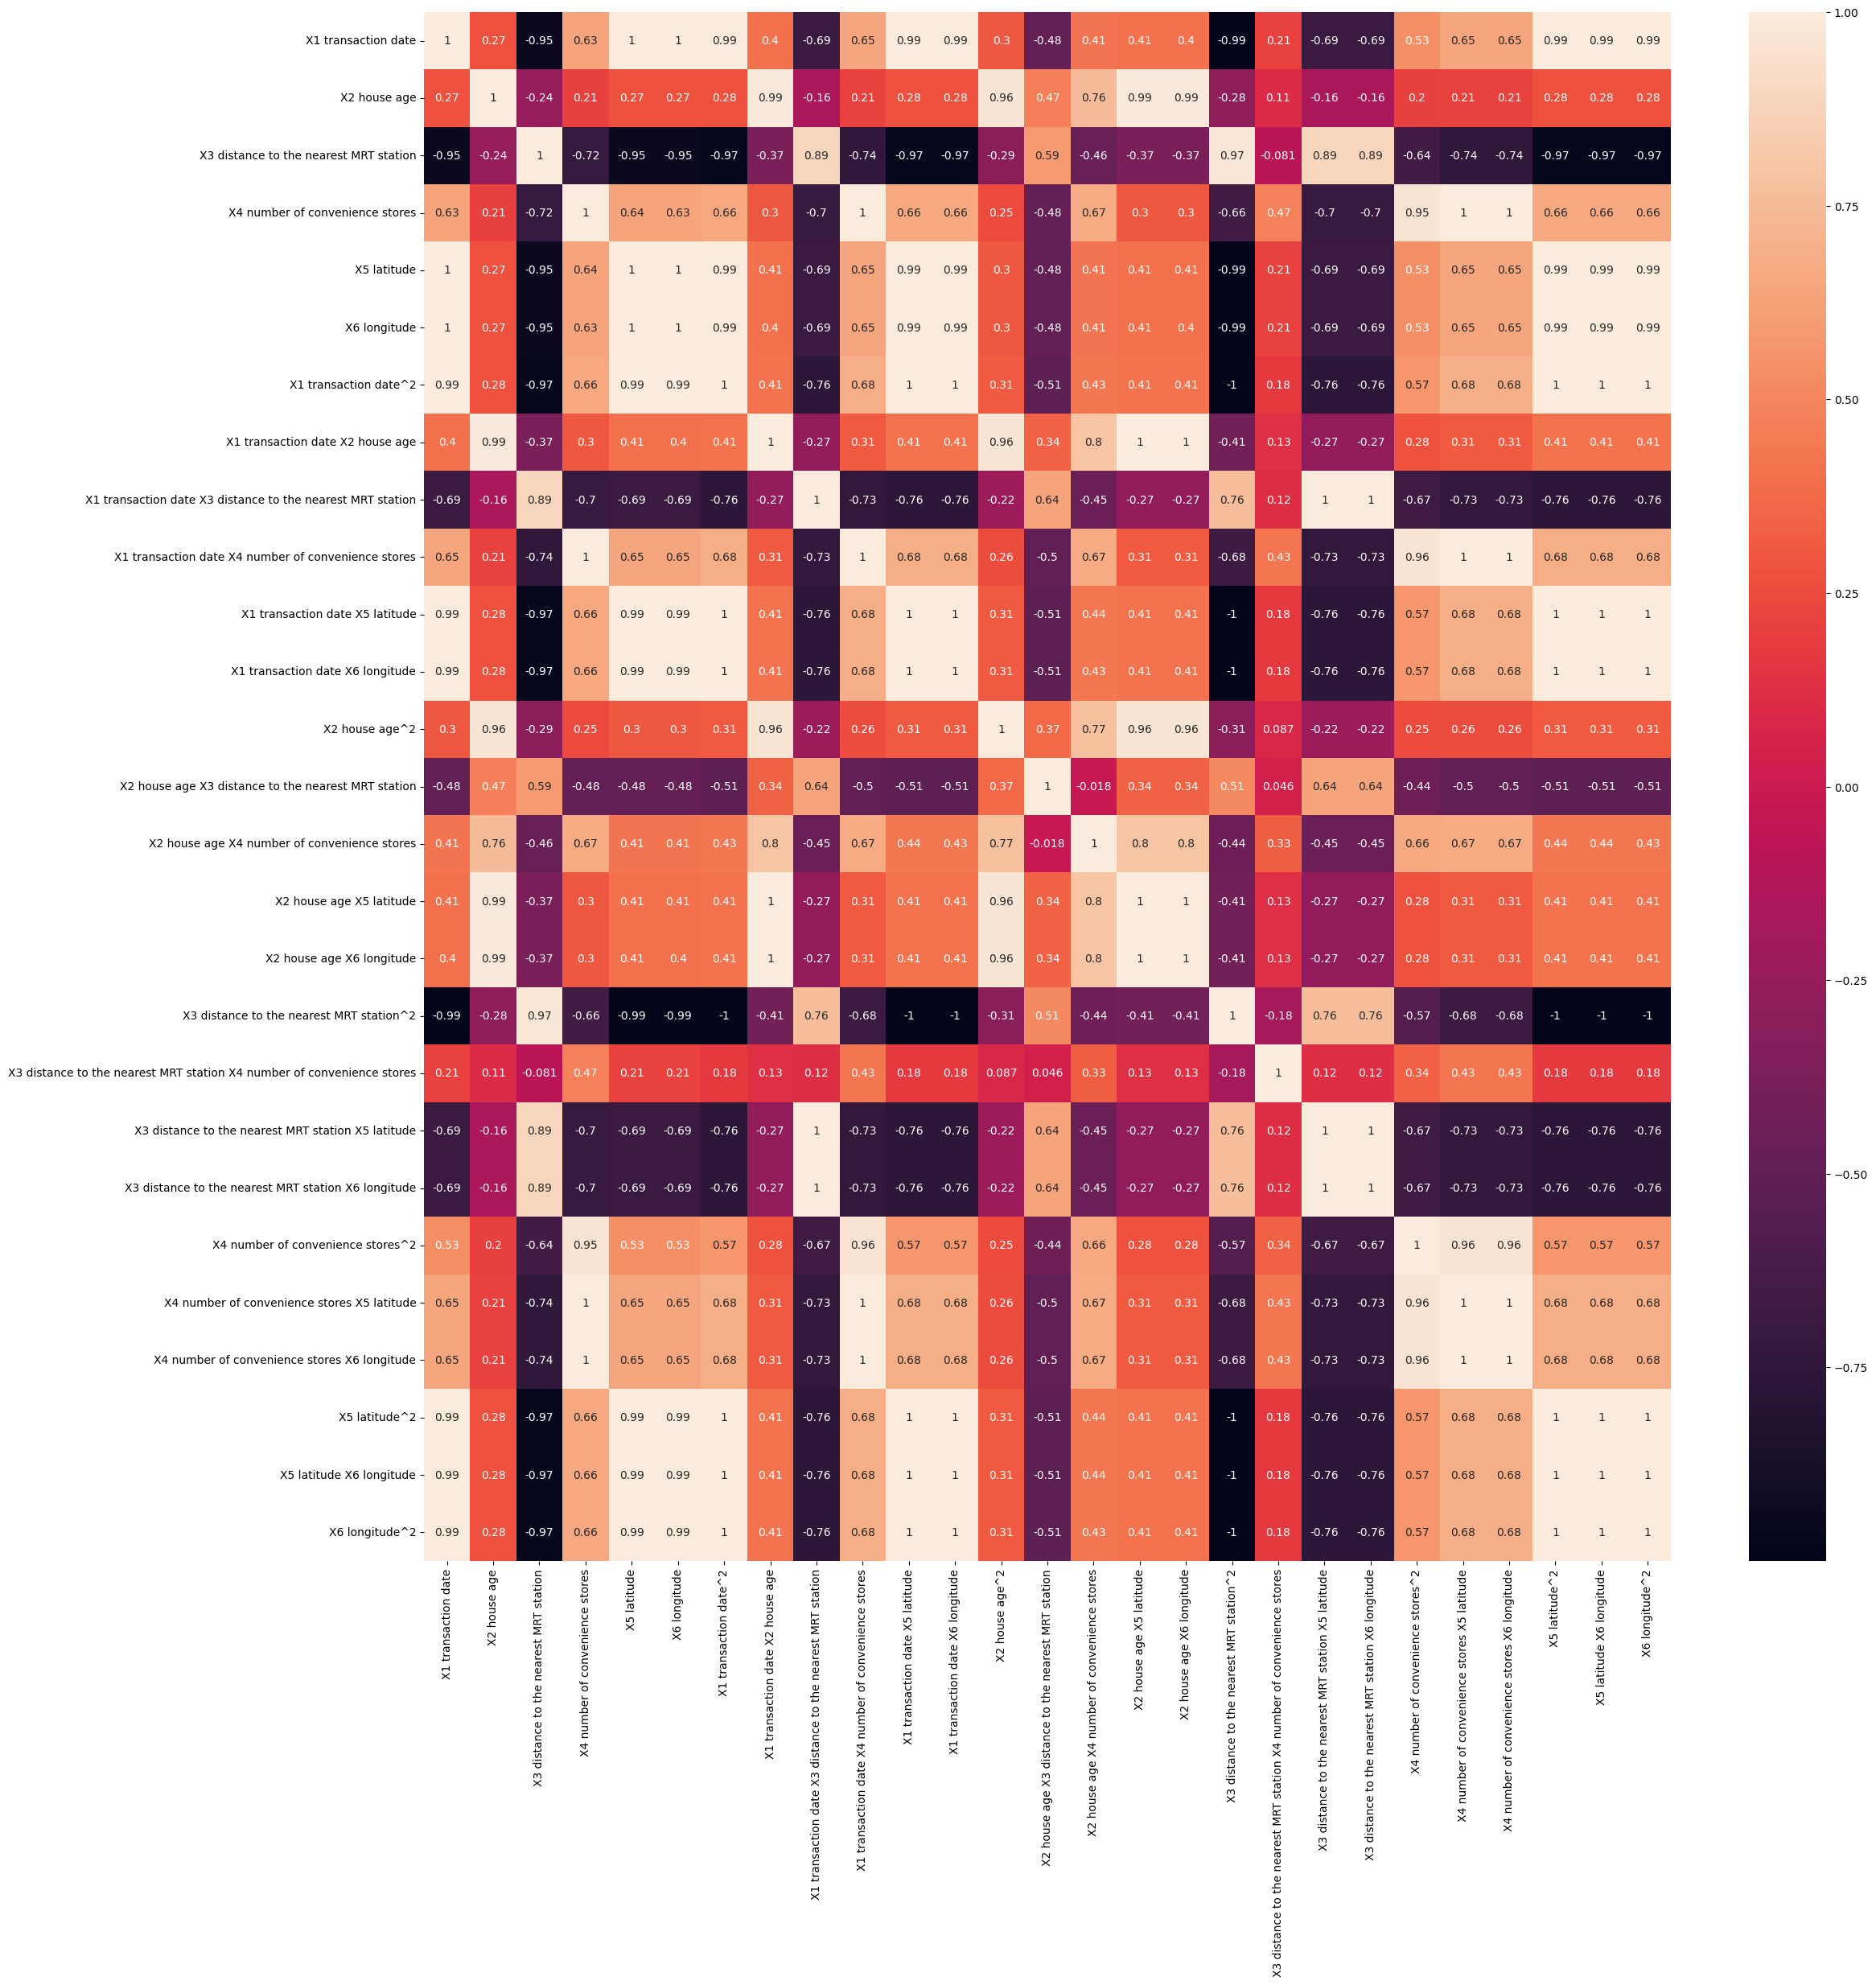

In [77]:
from sklearn.preprocessing import PolynomialFeatures

transform = PolynomialFeatures(2, include_bias=False)
X_train_transformed = transform.fit_transform(X_train)

fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(X_train_transformed.corr(), annot=True, fmt='.2g')

/tmp/ipykernel_75025/3145433483.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_test.values, y_pred, 'or', color='red' )


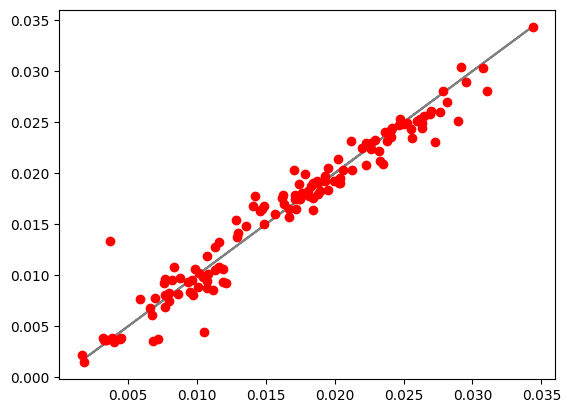

,metrics
MAE,0.001153
MSE,0.000003
RMSE,0.001681


In [78]:
current_model = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
current_model.fit(X_train, y_train)
y_pred =  current_model.predict(X_test)

plt.plot(y_test.values, y_test.values,color='grey')
plt.plot(y_test.values, y_pred, 'or', color='red' )
plt.show()

MAE  = mean_absolute_error(y_test,y_pred)
MSE  = mean_squared_error (y_test,y_pred)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE, MSE ,RMSE],index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

#### Пользовательские функции (Custom features)


Исходные признаки
$$
\{ x, y, z\}
$$

Целевые признаки
$$
\{ x, y, z, \sqrt{xy}, \sqrt{xz}, \sqrt{yz}, ... \}
$$

Какой вид имеют признаки следующего порядка?

In [79]:
from sklearn.base import BaseEstimator, TransformerMixin

RP_REGRESSION_TERMS_P1 = np.array([
    [1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1]
])
RP_REGRESSION_TERMS_P2 = np.concatenate((RP_REGRESSION_TERMS_P1,
np.array([
    [1/2, 1/2,   0,   0,   0,   0], [1/2,   0, 1/2,   0,   0,   0], [1/2,   0, 0, 1/2,   0,   0], [1/2, 0  , 0, 0, 1/2, 0], [1/2, 0, 0, 0, 0, 1/2],
    [  0, 1/2, 1/2,   0,   0,   0], [  0, 1/2,   0, 1/2,   0,   0], [0  , 1/2, 0,   0, 1/2,   0], [0  , 1/2, 0, 0, 0, 1/2],
    [  0,   0, 1/2, 1/2,   0,   0], [  0,   0, 1/2,   0, 1/2,   0], [0  ,   0, 1/2,   0, 0, 1/2],
    [  0,   0,   0, 1/2, 1/2,   0], [  0,   0,   0, 1/2,   0, 1/2],
    [  0,   0,   0,   0, 1/2, 1/2]
])))


RP_REGRESSION_TERMS = np.array([RP_REGRESSION_TERMS_P1, RP_REGRESSION_TERMS_P2], dtype=object)

class RootPolynomialFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, degree):
        self.degree_ = degree
        self.powers_ = RP_REGRESSION_TERMS[degree-1]
        self.is_fitted_ = False
        if degree > 2: self.degree_ = 2
        if degree < 0: raise ValueError('degree must not be less than zero')
    
    def fit(self, X, y = None):
        self.n_output_features_ = 8
        self.terms_ = RP_REGRESSION_TERMS[0]
        if self.degree_ == 2: 
            self.n_output_features_ = 28
            self.terms_ = RP_REGRESSION_TERMS[1]
               
        self.n_samples_, self.n_input_features_ = X.shape
        self.is_fitted_ = True

        return self

    def transform(self, X, y=None):
        if not self.is_fitted_:
            raise ValueError('Not fitted yet')
        features = []
        for term in self.terms_:
            features.append(np.prod(np.power(X, term), axis = 1))
        return np.array(features).T

    def fit_transform(self, X, y=None):
        self = self.fit(X, y)
        return self.transform(X, y)

<AxesSubplot:>

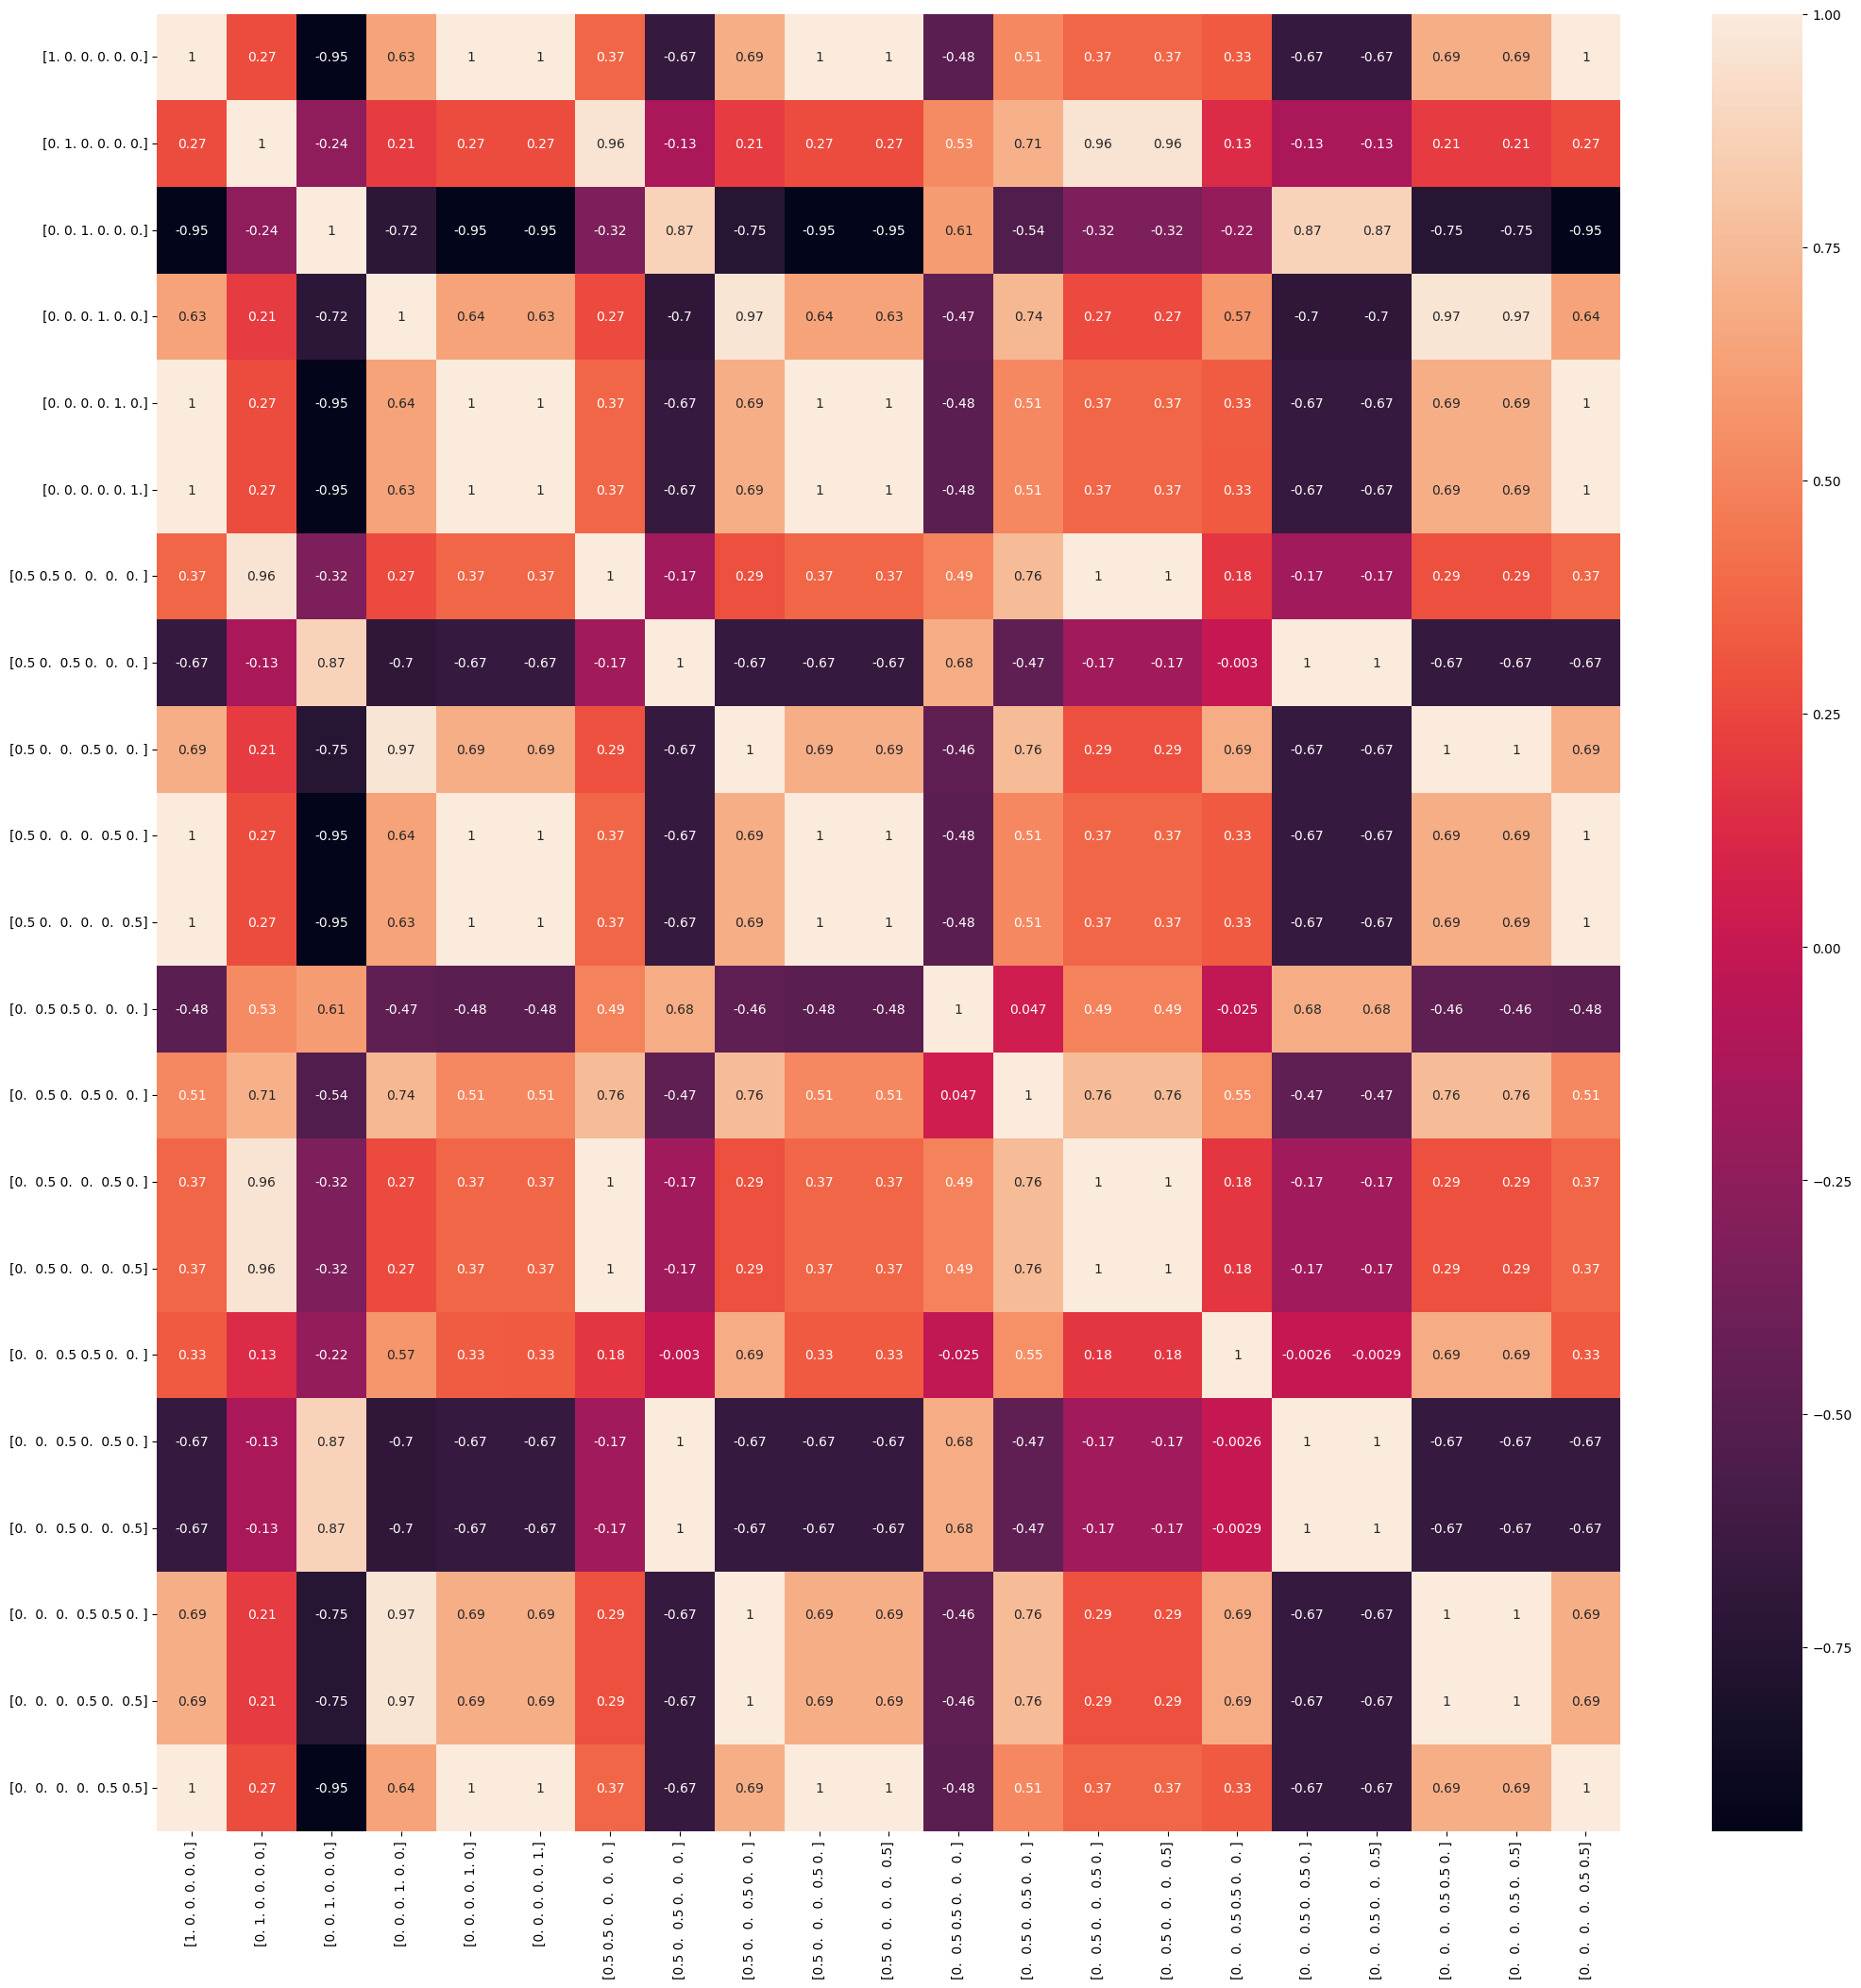

In [80]:
transform = RootPolynomialFeatures(2)

X_train_transformed = transform.fit_transform(X_train)
X_columns = list(map(str, transform.powers_))

X_train_transformed = pd.DataFrame(data=X_train_transformed, columns=X_columns)

fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(X_train_transformed.corr(method='pearson'), annot=True, fmt='.2g')

/tmp/ipykernel_75025/303925670.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_test.values, y_pred, 'or', color='red' )


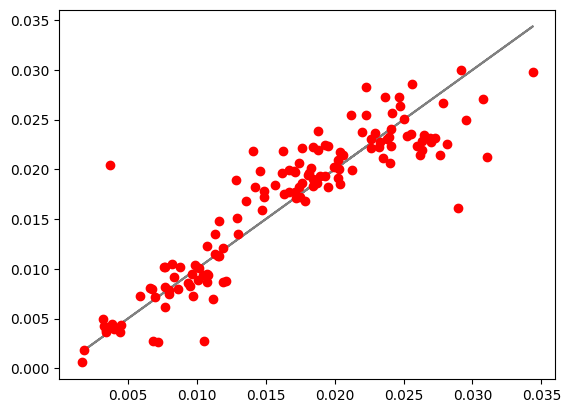

,metrics
MAE,0.002293
MSE,0.000011
RMSE,0.003318


In [81]:
current_model = make_pipeline(RootPolynomialFeatures(2),linear_model.LinearRegression())

current_model.fit(X_train, y_train)
y_pred =  current_model.predict(X_test)

plt.plot(y_test.values, y_test.values,color='grey')
plt.plot(y_test.values, y_pred, 'or', color='red' )
plt.show()

MAE  = mean_absolute_error(y_test,y_pred)
MSE  = mean_squared_error (y_test,y_pred)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE, MSE ,RMSE],index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

### Регуляризация

Применение разнообразных функций в нашей линейной модели делает ее намного более гибкой, но также и быстро приводит к переобучению.

### Ridge regression (Гребневая регрессия)

Вероятно, самый часто встречающийся вид регуляризации — гребневая регрессия (ridge regression), или $L_2$ -регуляризация ($L_2$ -regularization), также иногда называемая регуляризацией Тихонова. Она заключается в наложении штрафа на сумму квадратов (евклидовой нормы) коэффициентов модели.

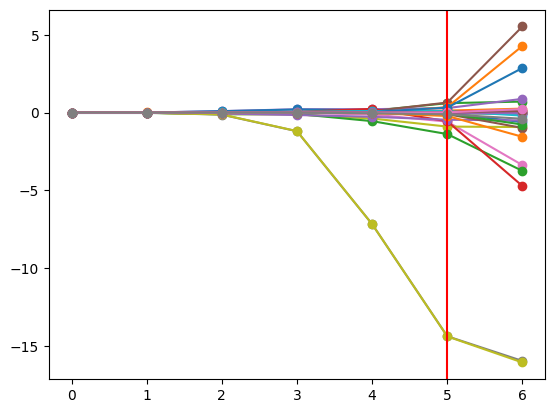

/tmp/ipykernel_75025/3899572395.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_test.values, y_pred, 'or', color='red' )


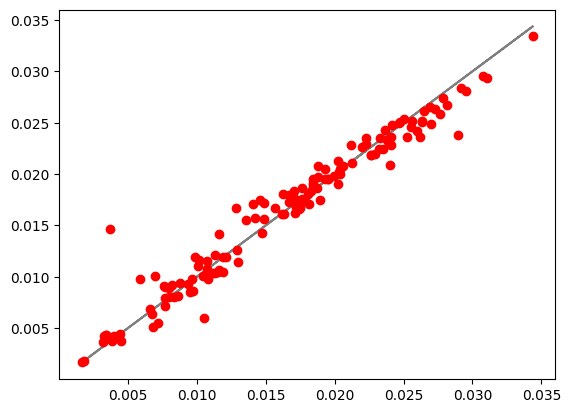

,metrics
MAE,0.001063
MSE,0.000003
RMSE,0.001631


In [86]:
# Ridge regression
#n_alpha = 30
#alpha_s = np.logspace(5, 0, n_alpha)
alpha_s = [ 1, 0.1, 1e-03, 1e-4, 1e-5, 1e-6, 1e-7]

#coefs = map(lambda a: make_pipeline(RootPolynomialFeatures(2), linear_model.Ridge(alpha=a)).fit(X_train, y_train)[1].coef_.flatten(), alpha_s)
coefs = map(lambda a: make_pipeline(PolynomialFeatures(2), linear_model.Ridge(alpha=a)).fit(X_train, y_train)[1].coef_.flatten(), alpha_s)
coefs = np.array(list(coefs))

# Ridge regression with cross validation
current_model = make_pipeline(PolynomialFeatures(2), linear_model.RidgeCV(alpha_s))
#current_model = make_pipeline(RootPolynomialFeatures(2), linear_model.RidgeCV(alpha_s))

b = current_model.fit(X_train, y_train)

fig, ax = plt.subplots()
plt.plot(coefs, marker="o")
plt.axvline(x=np.where(alpha_s == current_model[1].alpha_), c="r")
#plt.legend(X_train.columns)
#pml.savefig("prostate_data.pdf")
plt.show()

y_pred = b.predict(X_test)

plt.plot(y_test.values, y_test.values,color='grey')
plt.plot(y_test.values, y_pred, 'or', color='red' )
plt.show()

MAE  = mean_absolute_error(y_test,y_pred)
MSE  = mean_squared_error (y_test,y_pred)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE, MSE ,RMSE],index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

### Lasso regression (Лассо регрессия)

Следующий тип регуляризации — так называемая лассо-регуляризация, включающая штраф на сумму абсолютных значений ($L_1$ -норма) коэффициентов регрессии

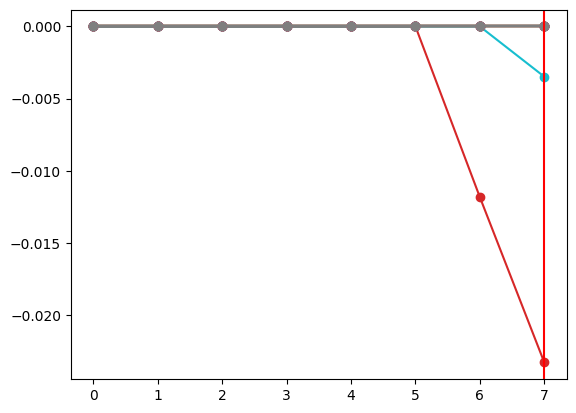

,metrics
MAE,0.002736
MSE,0.000015
RMSE,0.003924


In [90]:
# Lasso regression
alpha_s = [ 1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001, 0.00001 ]

coefs = map(lambda a: make_pipeline(PolynomialFeatures(2), linear_model.Lasso(alpha=a)).fit(X_train, y_train)[1].coef_.flatten(), alpha_s)
#coefs = map(lambda a: make_pipeline(RootPolynomialFeatures(2), linear_model.Lasso(alpha=a)).fit(X_train, y_train)[1].coef_.flatten(), alpha_s)
coefs = np.array(list(coefs))
# Lasso regression with cross validation
current_model = make_pipeline(PolynomialFeatures(2), linear_model.LassoCV(alphas=alpha_s))
#current_model = make_pipeline(RootPolynomialFeatures(2), linear_model.LassoCV(alphas=alpha_s))
b = current_model.fit(X_train, y_train)

fig, ax = plt.subplots()
plt.plot(coefs, marker="o")
plt.axvline(x=np.where(alpha_s == current_model[1].alpha_), c="r")
#plt.legend(X_train.columns)
plt.show()

y_pred = b.predict(X_test)

MAE  = mean_absolute_error(y_test,y_pred)
MSE  = mean_squared_error (y_test,y_pred)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE, MSE ,RMSE],index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

### ElasticNet = Ridge Regression + Lasso Regression

In [ ]:
# ElasticNet
alpha_s = [ 1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001, 0.0001, 0e-5 ]
'''
coefs = map(lambda a: linear_model.ElasticNet(alpha=a).fit(X_train, y_train).coef_.flatten(), alpha_s)
coefs = np.array(list(coefs))

# Lasso regression with cross validation
best_model = linear_model.ElasticNetCV(alphas=alpha_s)
b = best_model.fit(X_train, y_train)

fig, ax = plt.subplots()
plt.plot(coefs, marker="o")
plt.axvline(x=np.where(alpha_s == best_model.alpha_), c="r")
plt.legend(X_train.columns)
plt.show()

y_pred = b.predict(X_test)
mean_squared_error(y_test, y_pred)
'''
coefs = map(lambda a: make_pipeline(PolynomialFeatures(2), linear_model.ElasticNet(alpha=a)).fit(X_train, y_train)[1].coef_.flatten(), alpha_s)
#coefs = map(lambda a: make_pipeline(RootPolynomialFeatures(2), linear_model.ElasticNet(alpha=a)).fit(X_train, y_train)[1].coef_.flatten(), alpha_s)
coefs = np.array(list(coefs))
# Lasso regression with cross validation
current_model = make_pipeline(PolynomialFeatures(2), linear_model.ElasticNetCV(alphas=alpha_s))
#current_model = make_pipeline(RootPolynomialFeatures(2), linear_model.ElasticNetCV(alphas=alpha_s))
b = current_model.fit(X_train, y_train)

fig, ax = plt.subplots()
plt.plot(coefs, marker="o")
plt.axvline(x=np.where(alpha_s == current_model[1].alpha_), c="r")
#plt.legend(X_train.columns)
plt.show()

y_pred = b.predict(X_test)

MAE  = mean_absolute_error(y_test,y_pred)
MSE  = mean_squared_error (y_test,y_pred)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE, MSE ,RMSE],index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])
